In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [61]:
df=pd.read_csv("data/proce.csv")
df = shuffle(df)# shuffle dataset
y=df['Open']#target
df=df.drop('OpenInt',axis=1)
df=df.drop('Open',axis=1)
df=np.array(df)
print(len(df),len(y))
#labels and features 
y_train,y_test=np.reshape(np.array(y[0:1000]),(1000,1)),np.reshape(np.array(y[1000:1232]),(232,1))#train and test label 
print(y_train.shape,y_test.shape)
x_train,x_test=np.array(df[0:1000]),np.array(df[1000:1232])#train and test features
print(x_train.shape,x_test.shape)

1232 1232
(1000, 1) (232, 1)
(1000, 4) (232, 4)


In [62]:
X = tf.placeholder("float", [None, 4])#4 features high,low,close and volume
Y = tf.placeholder("float", [None, 1])#1 output label open

In [75]:
weights = {
    'h1': tf.Variable(tf.random_normal([4, 10])),#4 inputs 10  nodes in h1 layer
    'h2': tf.Variable(tf.random_normal([10, 10])),# 10 nodes in h2 layer
    'out': tf.Variable(tf.random_normal([10, 1]))# 1 ouput label
}
biases = {
    'b1': tf.Variable(tf.random_normal([10])),
    'b2': tf.Variable(tf.random_normal([10])),
    'out': tf.Variable(tf.random_normal([1]))
}

In [114]:
def neural_net(x):
    #hidden layer 1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)#activation
    #hideen layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_1 = tf.nn.relu(layer_2)#activation
    # output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return (out_layer)

In [115]:
Y_hat=neural_net(X)
loss_op=tf.losses.mean_squared_error(Y,Y_hat)#loss function
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)#define optimizer # play around with learning rate
train_op = optimizer.minimize(loss_op)#minimize losss
init = tf.global_variables_initializer()
epoch=2000
with tf.Session() as sess:
    sess.run(init)
    for i in range(0,epoch):
        sess.run(train_op,feed_dict={X:x_train,Y:y_train})
        loss=sess.run(loss_op,feed_dict={X:x_train,Y:y_train})
        if(i%100==0):
            print("epoch no"+str(i),(loss))
        pred=sess.run(Y_hat,feed_dict={X:x_test})


epoch no0 828864.9
epoch no100 119.71856
epoch no200 106.64258
epoch no300 93.54088
epoch no400 79.65667
epoch no500 66.84348
epoch no600 53.981308
epoch no700 42.354023
epoch no800 32.755474
epoch no900 25.619707
epoch no1000 20.69074
epoch no1100 16.34973
epoch no1200 12.929059
epoch no1300 10.565858
epoch no1400 8.9867115
epoch no1500 7.8561597
epoch no1600 7.067653
epoch no1700 6.4942737
epoch no1800 6.10228
epoch no1900 6.8666124


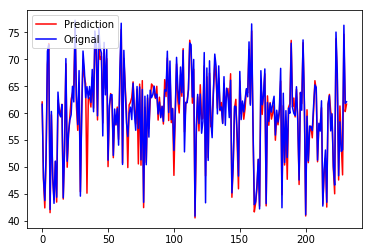

In [116]:
plt.plot((pred), color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Orignal')
plt.legend(loc='upper left')
plt.show()